## Assignment 2

In [23]:
from plotnine import *
import pandas as pd
import numpy as np


In [24]:
tr_data = pd.read_csv("../data/tr_data.csv")
tr_data.head()

,site,mode,division,region,destination,shipping_date,invoice_date,usda_invoice_amount
0,US77,less_truck_load,NaN,EMEA,Amsterdam,2022-01-01,2022-01-27,715.603599
1,US62,std_air,F928,EMEA,Paris,2022-01-01,2022-01-02,368.346398
2,TH2E,full_container_load,E916,EMEA,Dubai,2022-01-01,2022-02-12,5605.915943
3,US77,exp_air,E174,EMEA,Amsterdam,2022-01-01,2022-01-07,1327.171393
4,US77,exp_air,E174,EMEA,Dubai,2022-01-01,2022-01-07,1237.849165


### Question 1
##### Revisit the "data need" you included for your Assignment 1 (Question 3). Does this data match your expectations? What challenges do you expect to face with this dataset? What mitigation strategies would you employ to deal with those challenges? Please elaborate on your response.

There were three things I had listed as data I wanted to get which were: past budget vs actual information, past shipping information to see the number of shipments by division, and shipping costs. This file includes the past shipment information by division with costs so it is a start.

After finally getting the file to be readable... I see that there are some null values and I'm sure there will likely be some other mysterious things to clean up.

Overall I don't think this dataset will really be very helpful in addressing the issue of delayed invoices because the problem isn't a lack of data it is a poorly managed shipping process.

### Question 2
##### Now that we have access to some data, we can start exploring different breakdowns to gain insights into various features. Let's start with simple, broader questions.

##### - Write a Python code to find the number of non-null values in each column. Write a brief discussion on your findings regarding the non-null values.

In [25]:
tr_data.notna().sum()

site                   200549
mode                   208157
division               185843
region                 208799
destination            208799
shipping_date          208799
invoice_date           208799
usda_invoice_amount    208799
dtype: int64

Above are the number of non-null values in each column. They are in the columns site, mode, and division, and also this "Unnamed: 8" column which I think is some kind of glitch.  Division has the largest number of null values which account for 22,956 out of 208,799 rows, or 11% of all rows.  That is a significant amount so I would be hesitant to remove them all but if division is a key category and region can't be used instead I would need to remove those.

##### - Write a Python code to find the average, minimum, and maximum invoice amounts.

In [26]:
tr_data["usda_invoice_amount"] = pd.to_numeric(tr_data["usda_invoice_amount"], errors="coerce")


In [27]:
tr_data["usda_invoice_amount"].mean()

np.float64(12779.144710981744)

In [28]:
tr_data["usda_invoice_amount"].min()

np.float64(0.0076120185195449)

In [29]:
tr_data["usda_invoice_amount"].max()

np.float64(192806.67593128016)

Average = 12,783.1318
Minimum = 0.0076
Maximum = 192,806.6759

### Question 3

#### Write Python code to create ggplots, answering the following questions.

##### A. Which manufacturing site has placed the largest number of transportation tasks?

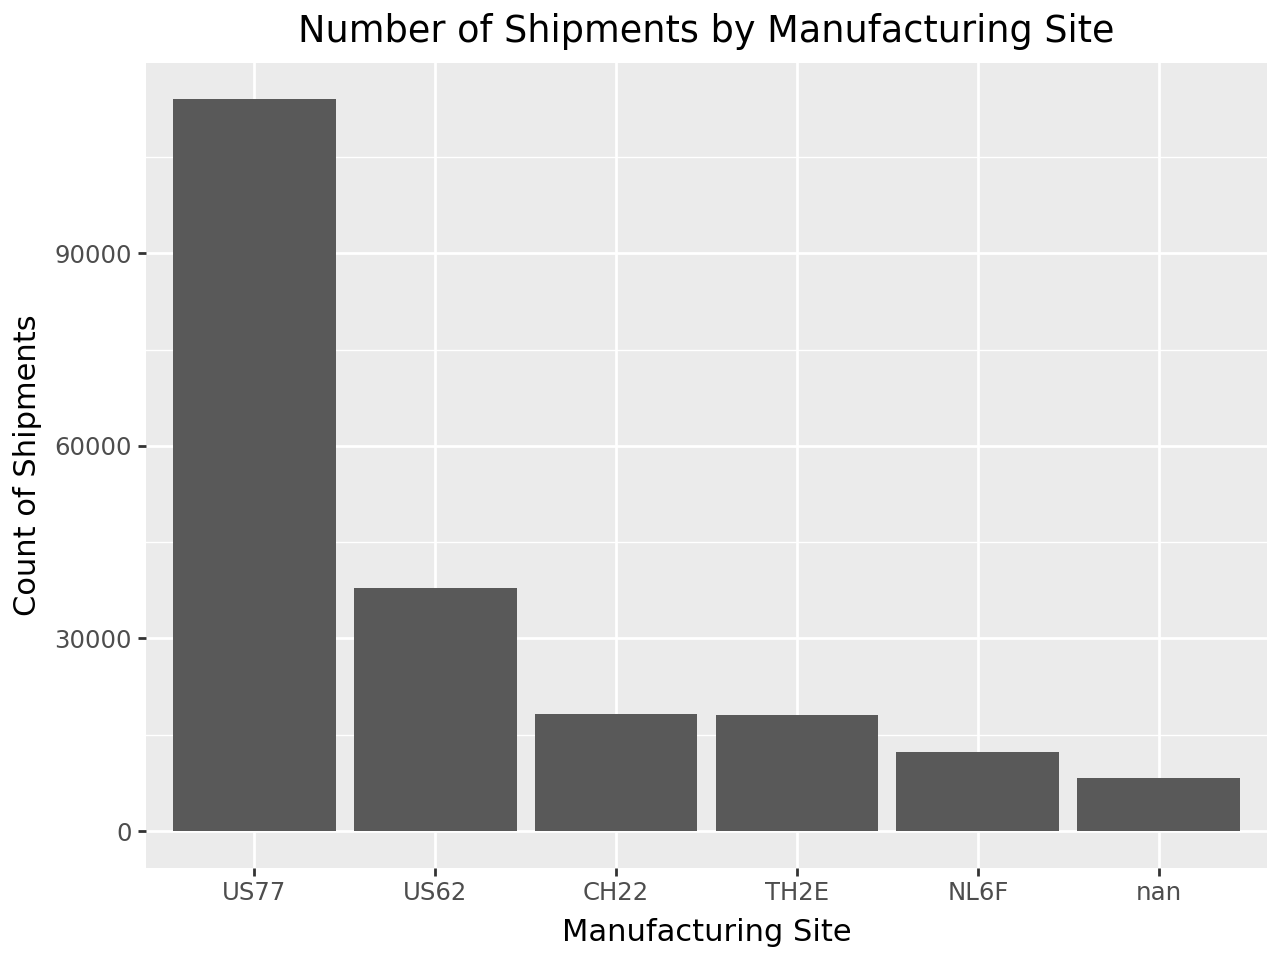

In [30]:
p = ggplot(data=tr_data,  mapping=aes(x="reorder(site, site, len, ascending=False)"))
p + geom_bar() + labs(
    title="Number of Shipments by Manufacturing Site",
    x="Manufacturing Site",
    y="Count of Shipments")

The US77 site has the largest number of shipments.

##### B. Does the answer to the above question change when the visualization is broken down by region?

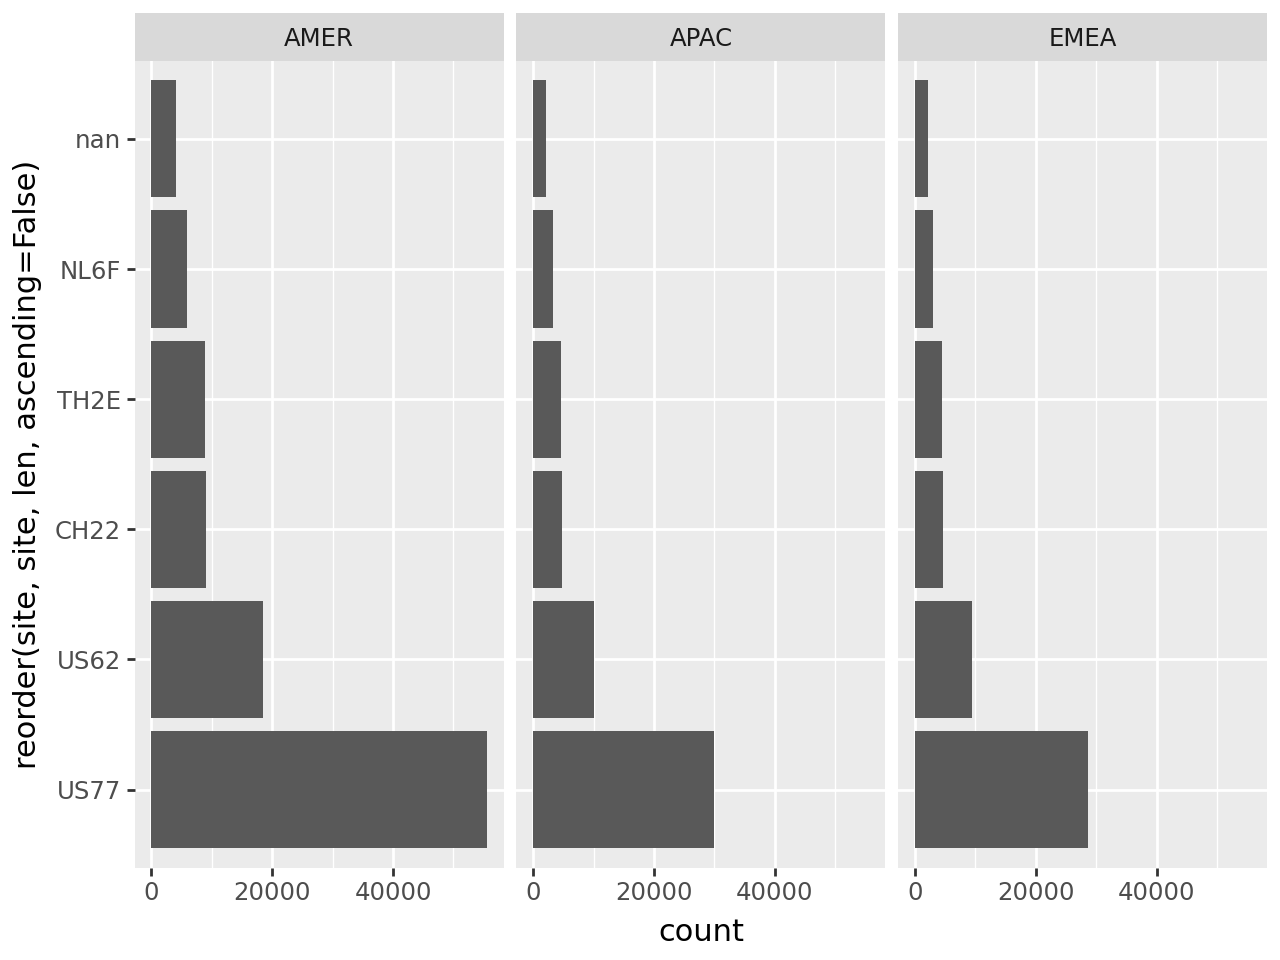

In [31]:
p + geom_bar(mapping=aes(x="reorder(site, site, len, ascending=False)")) + coord_flip() + facet_wrap("region")

US77 has the most tasks for each region.

##### C. Which transportation mode has been utilized the most?

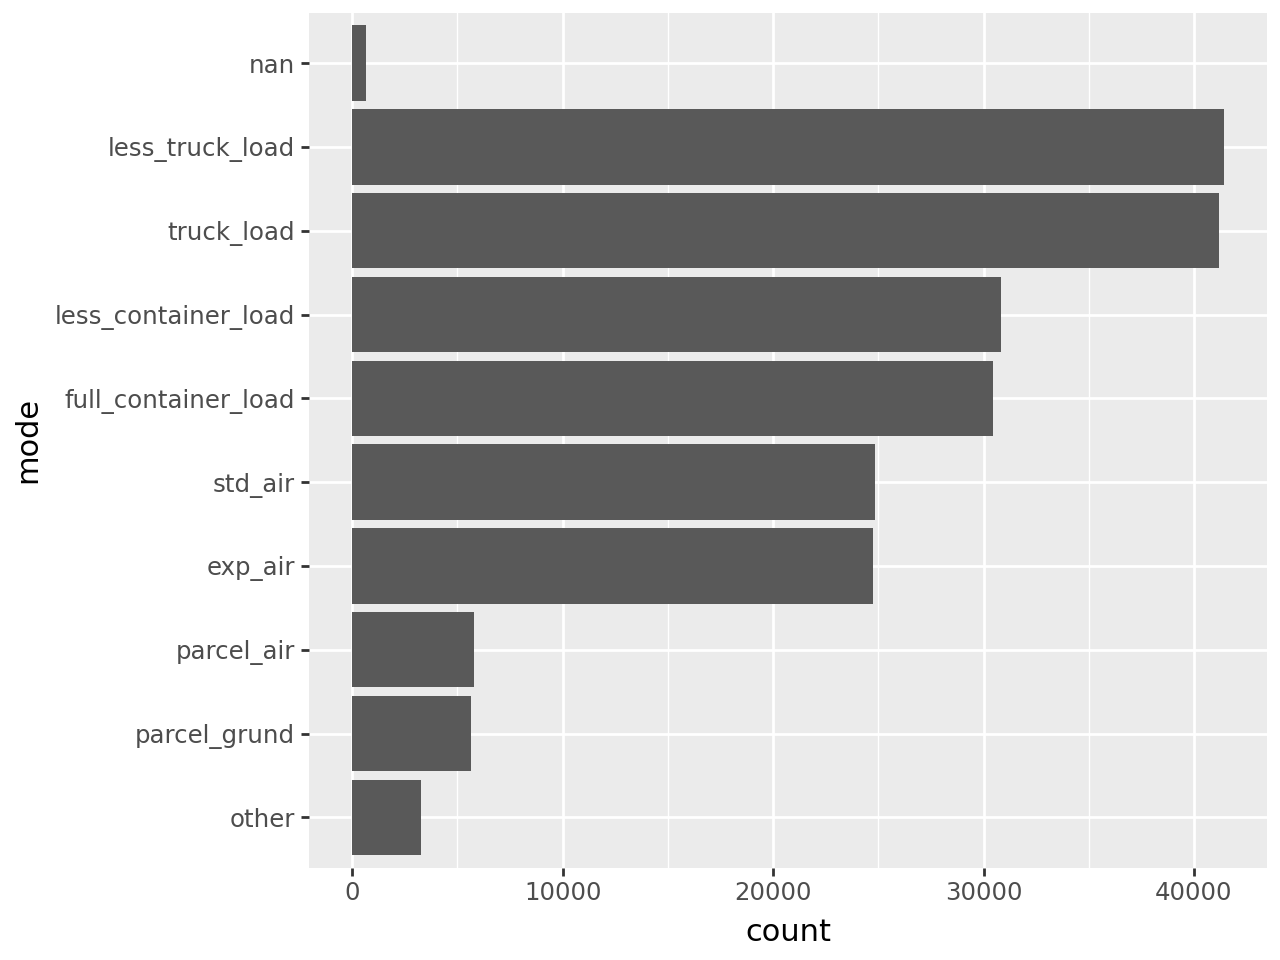

In [32]:
p = ggplot(data = tr_data, mapping = aes(x = "mode"))
p + geom_bar(mapping=aes(x="reorder(mode, mode, len, ascending=True)")) + coord_flip()

Less than truckload and truck_load are the most utilized transportation modes.

### Question 4

##### A. Use both histograms and density plots to find out how the delay is distributed across different regions. How about different sites? Provide a written explanation for each visualization you create.

In [33]:
tr_data["shipping_date"] = pd.to_datetime(tr_data["shipping_date"])
tr_data["invoice_date"] = pd.to_datetime(tr_data["invoice_date"])
tr_data["delay"] = tr_data["invoice_date"] - tr_data["shipping_date"]
tr_data_clean = tr_data.dropna()

c:\Users\gibbs002\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\stats\stat_bin.py:112: PlotnineWarning: 'stat_bin()' using 'bins = 152'. Pick better value with 'binwidth'.


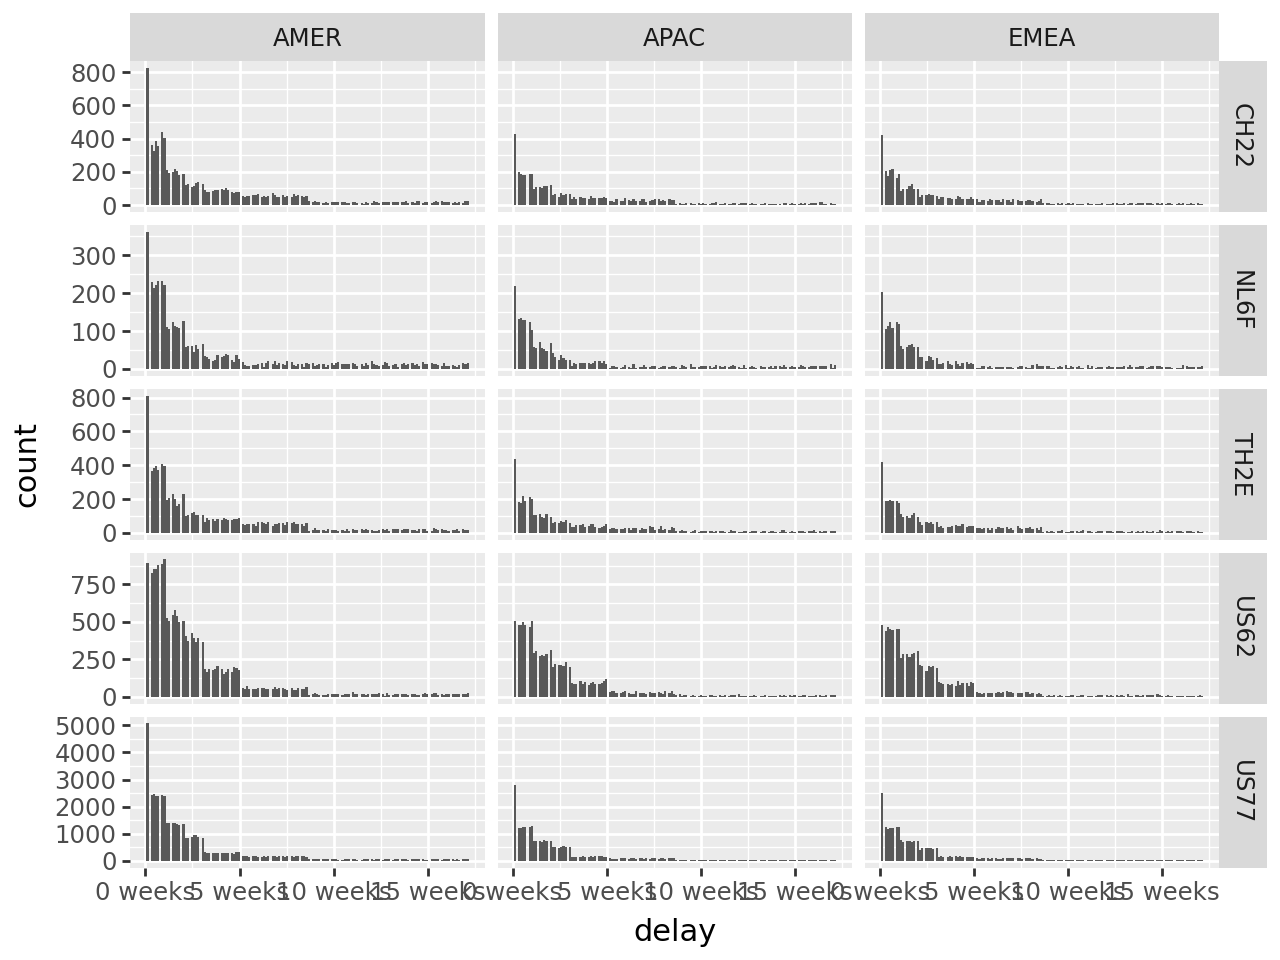

In [34]:
p = ggplot(data = tr_data_clean, mapping = aes(x = "delay"))
p + geom_histogram() + facet_grid("site", "region",scales="free_y")

The trend seems to be the same across all regions and sites. Short delays are more frequent and long delays are less frequent.

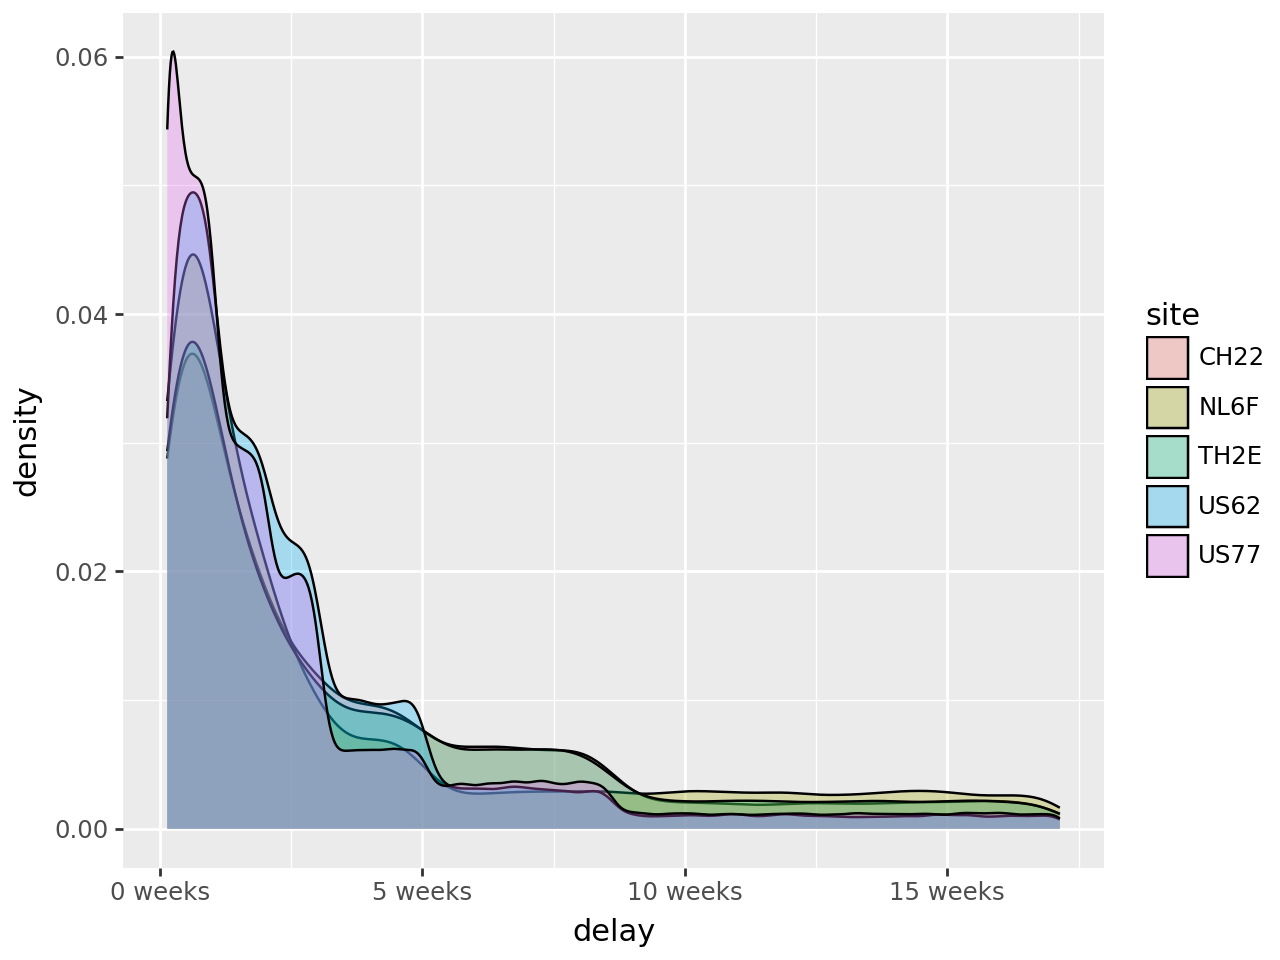

In [35]:
p = ggplot(data = tr_data_clean, mapping = aes(x = "delay", fill ="site"))
p + geom_density(alpha = 0.3)

This density chart also shows the trend of a high number of short delays and a lower frequency of long delays. This doesn't seem helpful to my task of reducing invoice times not only because it isn't a very good visualization but also because the underlying data is uninteresting.

#### B. Is there a relationship between the delay feature and invoice amount? Does this relationship hold across different regions? How about different manufacturing sites? Provide a written explanation for each visualization you create.

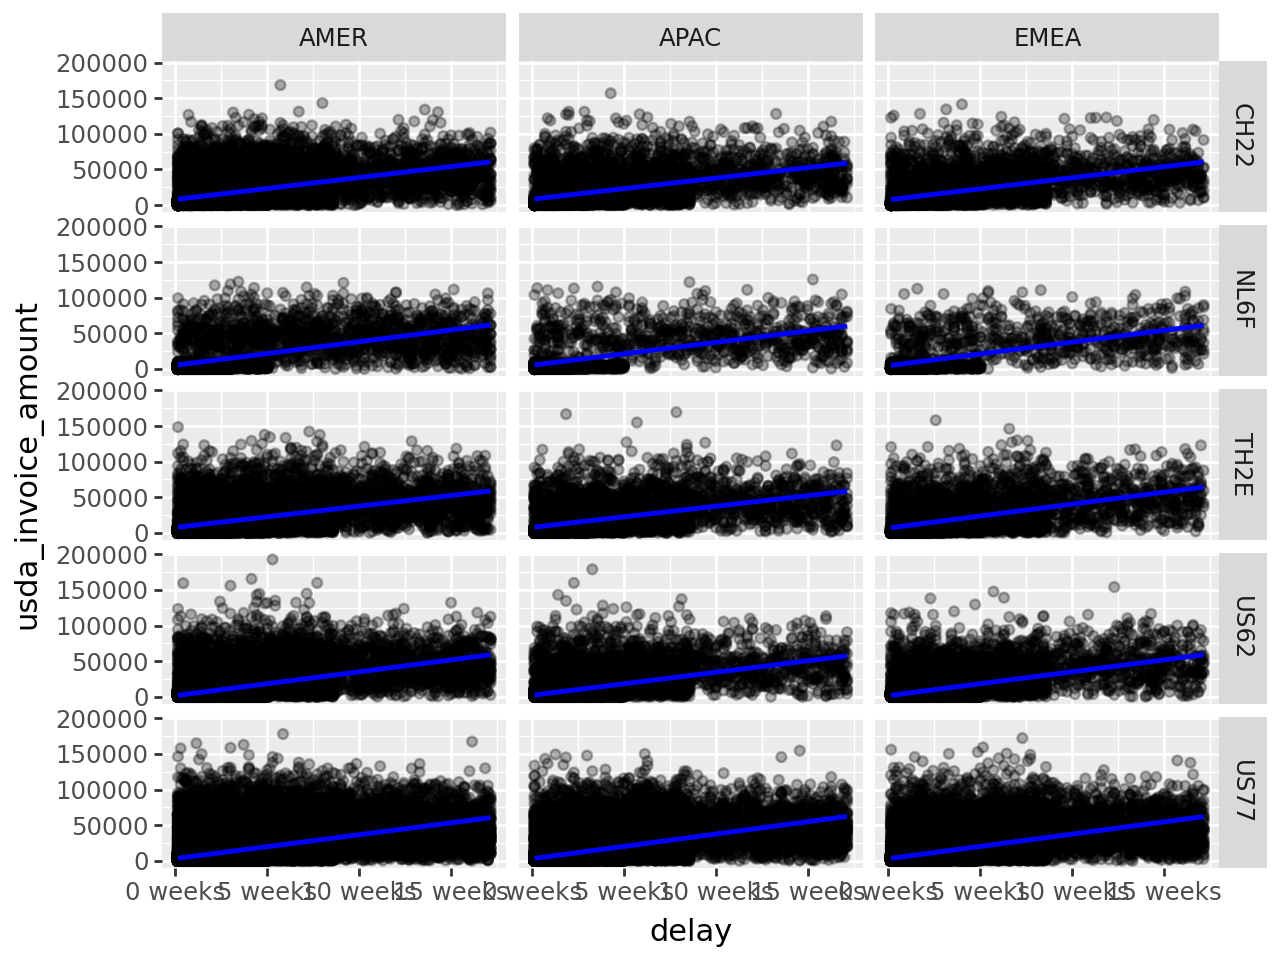

In [36]:
p = ggplot(data = tr_data_clean, mapping = aes(x = "delay", y = "usda_invoice_amount"))
p + geom_point(alpha = 0.3) + facet_grid("site", "region") + geom_smooth(color = "blue")

This is odd looking but seems to indicate an upward trend, as the delay grows larger across the x axis the value of the related invoice is higher.

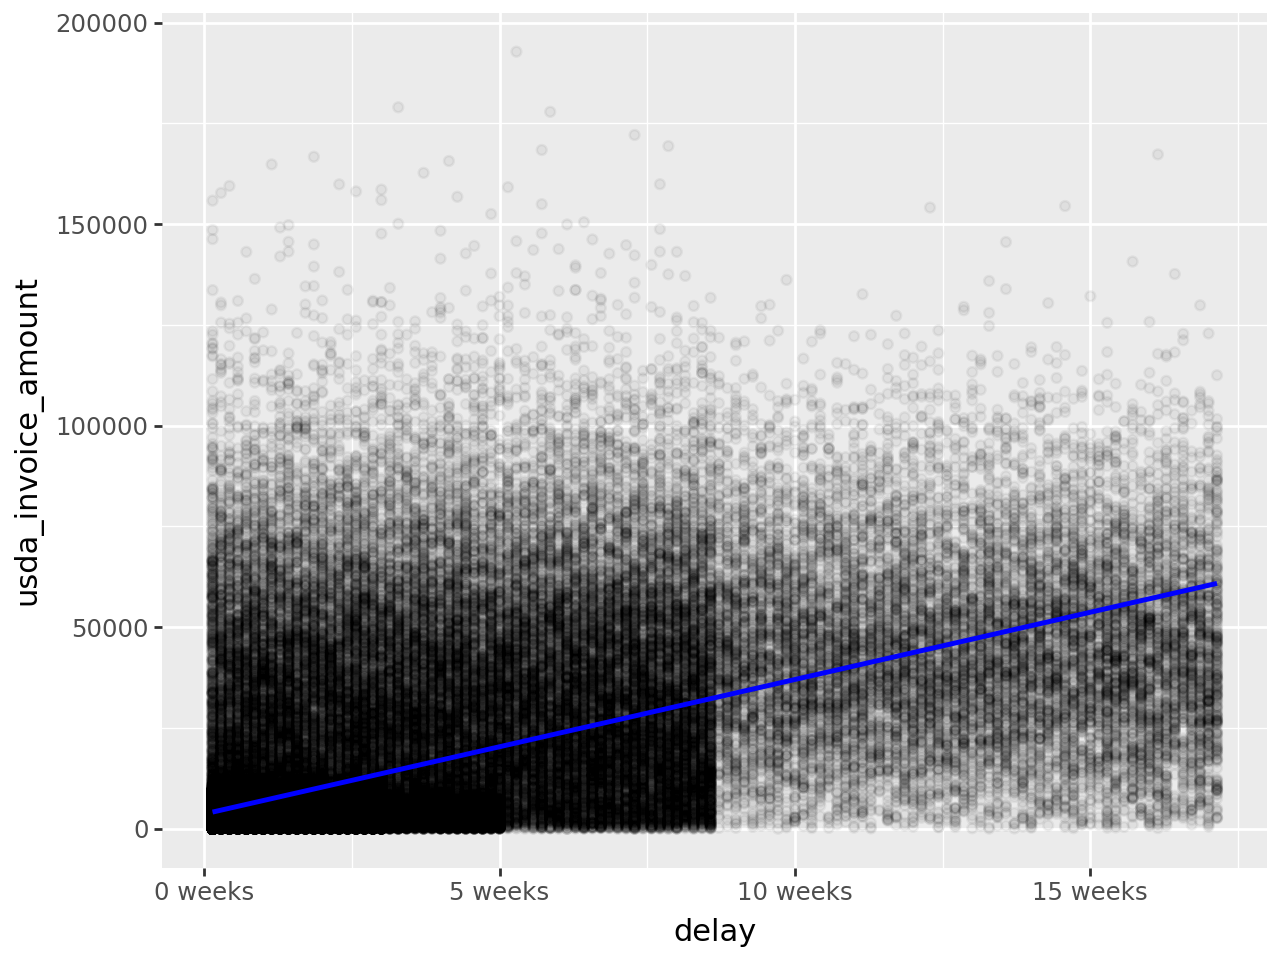

In [37]:
p = ggplot(data = tr_data_clean, mapping = aes(x = "delay", y = "usda_invoice_amount"))
p + geom_point(alpha = 0.05) + geom_smooth(color = "blue")

Though it isn't super clear the trendline does show that longer delays tend to be for higher value shipments. This would make sense logically if we were talking about large containerload overseas shipments where there would be a long time between the shipment date and the invoice date due to shipping time.

### Question 5

##### Given your findings thus far, it is worthwhile to explore the delay variable across different transportation modes. Write Python code to create a ggplot to preview the distribution of delay across different modes of transportation. Provide a written explanation for this visualization and refine your visual as much as possible.

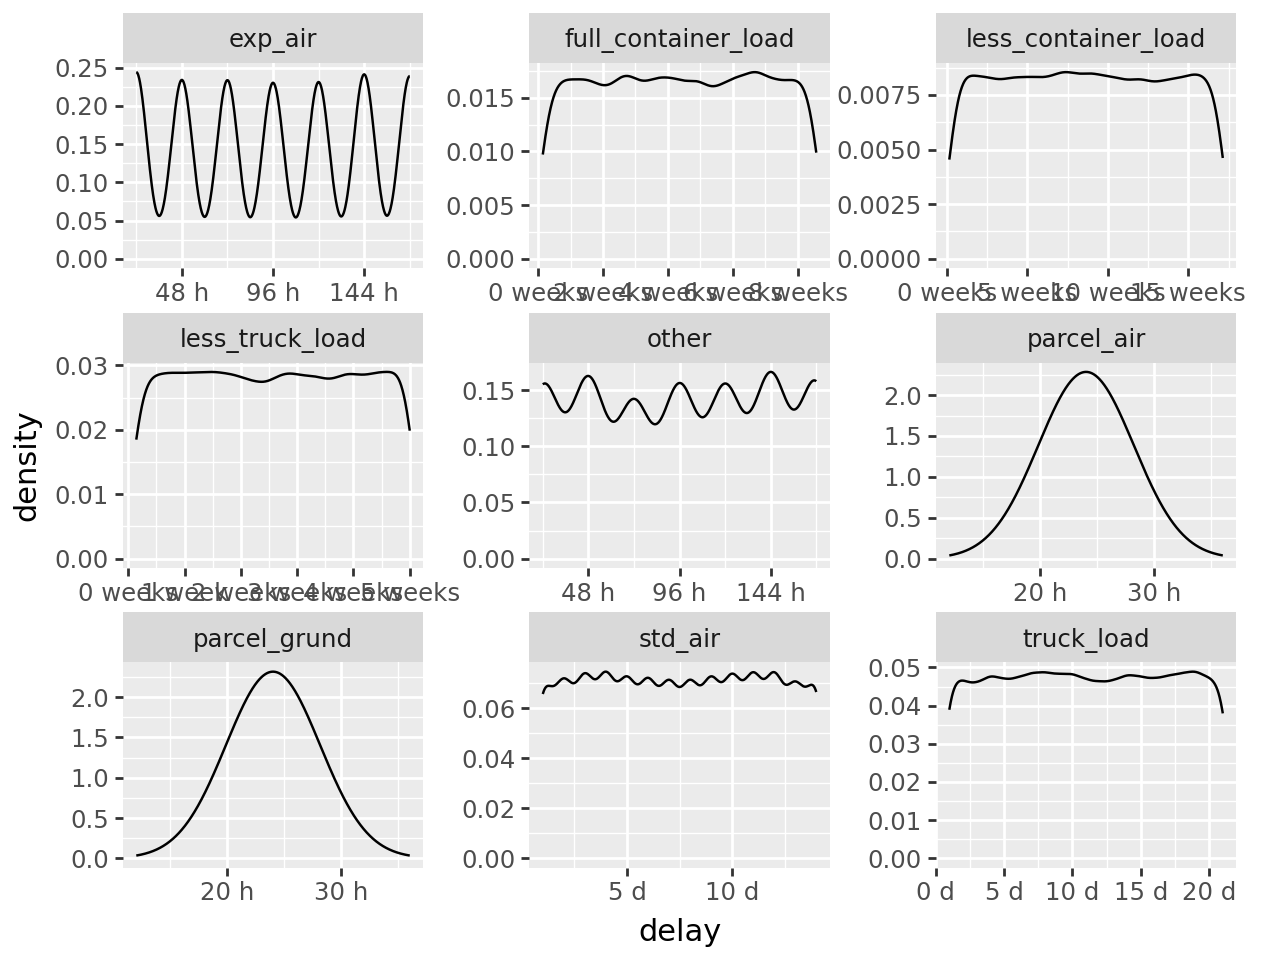

In [38]:
p = ggplot(tr_data_clean, aes("delay")) + geom_density() + facet_wrap("mode", scales="free")
p

As I was suspecting the container load shipments (full container and less than full container load) have the highest delays between their ship date and their invoice date. This makes sense because final invoices can't be created until the shipment is delivered. Shipments with short transit times like parcel shipments have very short delays between ship date and invoice date.

### Question 1 — Delay Distribution by Mode

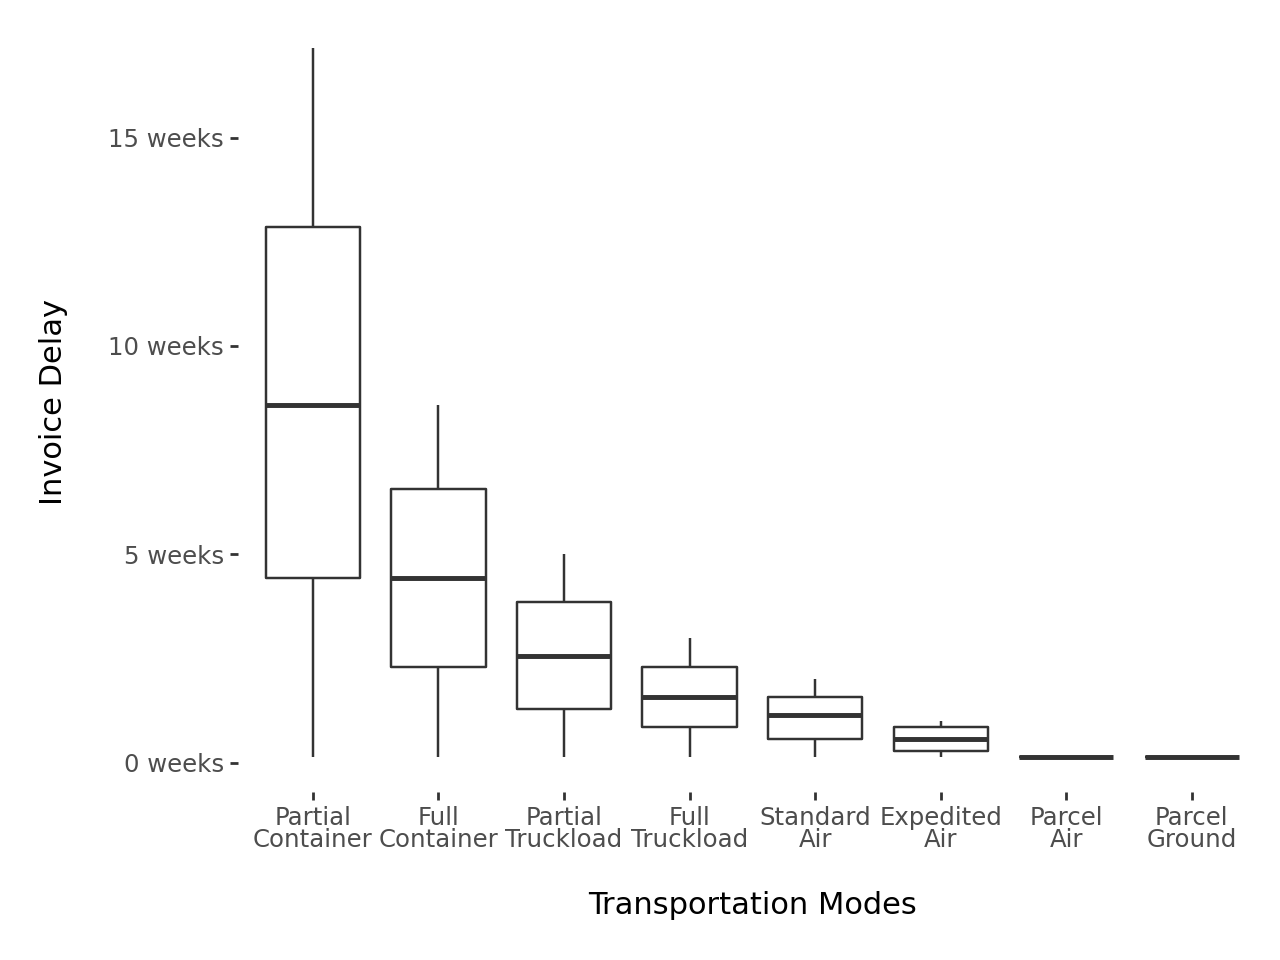

In [39]:
tr_data = pd.read_csv("../data/tr_data.csv")

tr_data = tr_data.dropna(subset = ["mode"])
tr_data = tr_data[tr_data["mode"] != "other"]

tr_data["invoice_date"] = pd.to_datetime(tr_data["invoice_date"])
tr_data["shipping_date"] = pd.to_datetime(tr_data["shipping_date"])
tr_data["invoice_delay"] = tr_data["invoice_date"] - tr_data["shipping_date"]

fancy_names = {
    "less_container_load":"Partial\nContainer",
    "full_container_load":"Full\nContainer",
    "less_truck_load":"Partial\nTruckload",
    "truck_load": "Full\nTruckload",
    "std_air":"Standard\nAir",
    "exp_air":"Expedited\nAir",
    "parcel_air":"Parcel\nAir",
    "parcel_grund":"Parcel\nGround"
    }

tr_data["mode"] = tr_data["mode"].replace(fancy_names)


p = ggplot(data = tr_data, mapping = aes(x = "reorder(mode, -invoice_delay)", y = "invoice_delay", group = "mode"))
           
p = p + geom_boxplot() + labs(x = "\nTransportation Modes\n", y = "\nInvoice Delay\n") + theme_tufte()

p

In [40]:
ggsave(p, filename = "../plots/delay_dist_by_mode.png", width=10, height = 5, units="in", dpi=300)

c:\Users\gibbs002\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\ggplot.py:630: PlotnineWarning: Saving 10 x 5 in image.
c:\Users\gibbs002\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\ggplot.py:631: PlotnineWarning: Filename: ../plots/delay_dist_by_mode.png


### Question 2 — Invoice Time Series

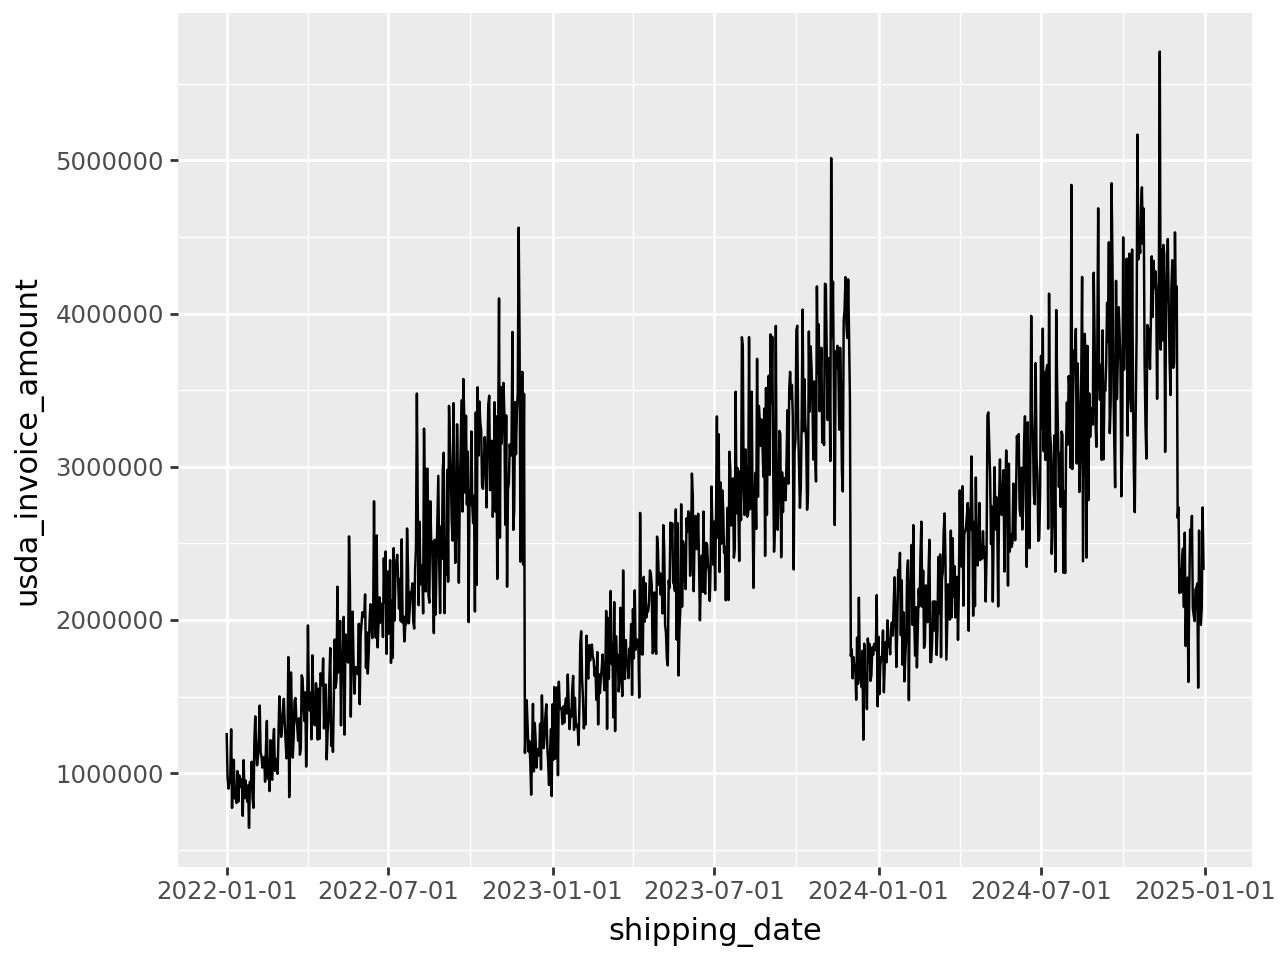

In [41]:
tr_daily = (tr_data.groupby('shipping_date', as_index=False).agg({'usda_invoice_amount': 'sum'}))


p1 = ggplot(data = tr_daily, mapping = aes(x = 'shipping_date', y = 'usda_invoice_amount')) + geom_line()


p1

##### This initial plot seems to show seasonality with the value of shipments ramping up and down in a pattern. This is the combination of all modes though so it isn't clear if this trend appliers to all modes and we are most interested in the modes with the highest invoice delays.

##### As you suggested in the question it would make sense to split this up by mode so that we can see if our container load and truckload categories which have the highest invoice delays also follow this seasonal trend.

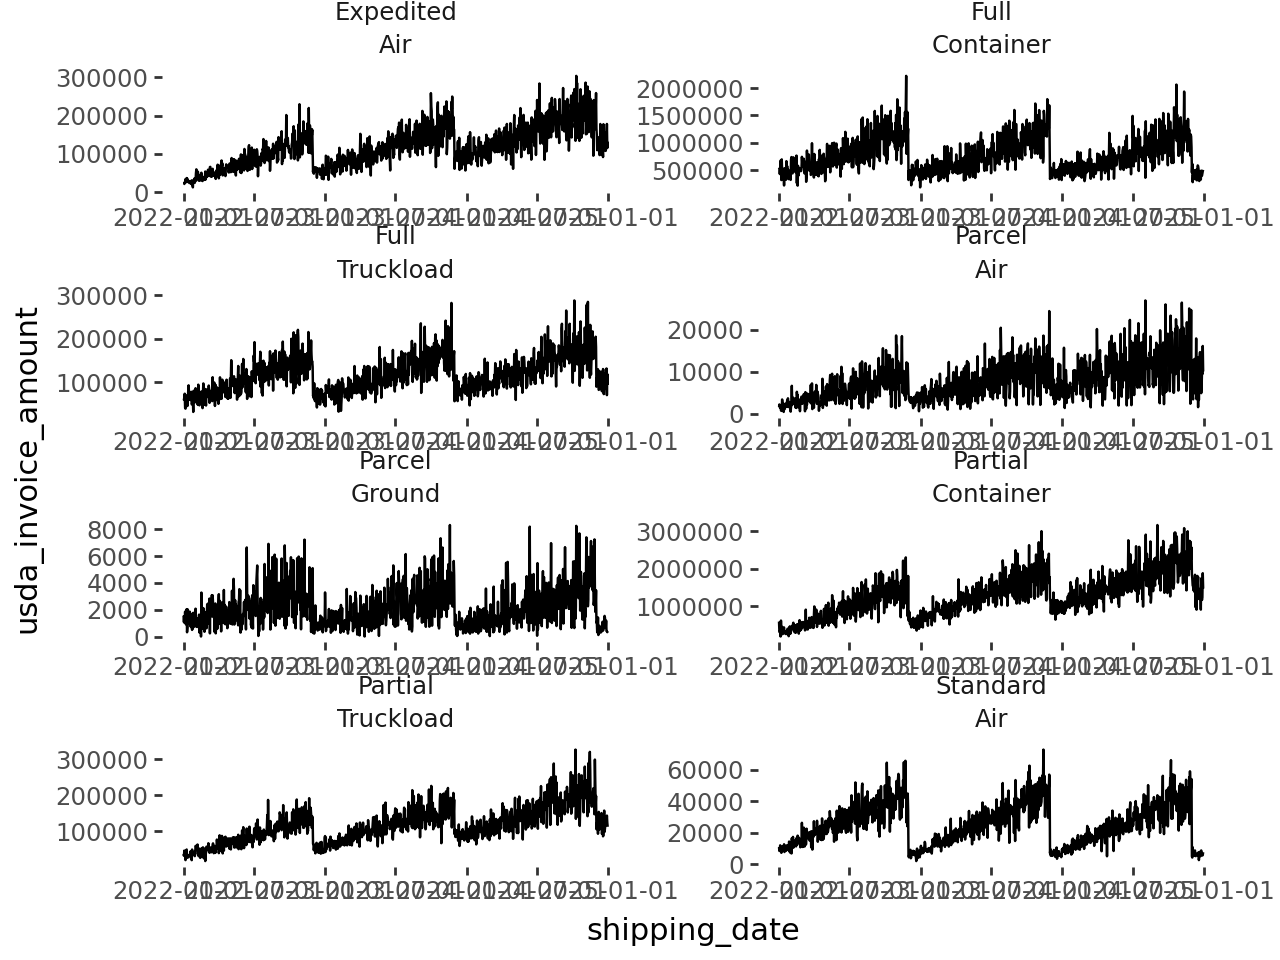

In [42]:
tr_daily_mode = (tr_data.groupby(['shipping_date', 'mode'], as_index=False).agg({'usda_invoice_amount': 'sum'}))

p2 = ggplot(tr_daily_mode, aes(x='shipping_date', y='usda_invoice_amount')) + geom_line() + facet_wrap('~mode', ncol=2, scales='free') + theme_tufte()

p2

##### Now we can see that container and truck shipments follow this seasonal trend and also have the highest dollar value of the different modes.

##### I'm still note excited about this plot even with the facets because it has all of the modes and I am only interested in container and truckload shipments since they represent the most dollars and have the largest delays. The delays of 1 or 2 weeks are not significant enough to be an issue so I will reduce the 

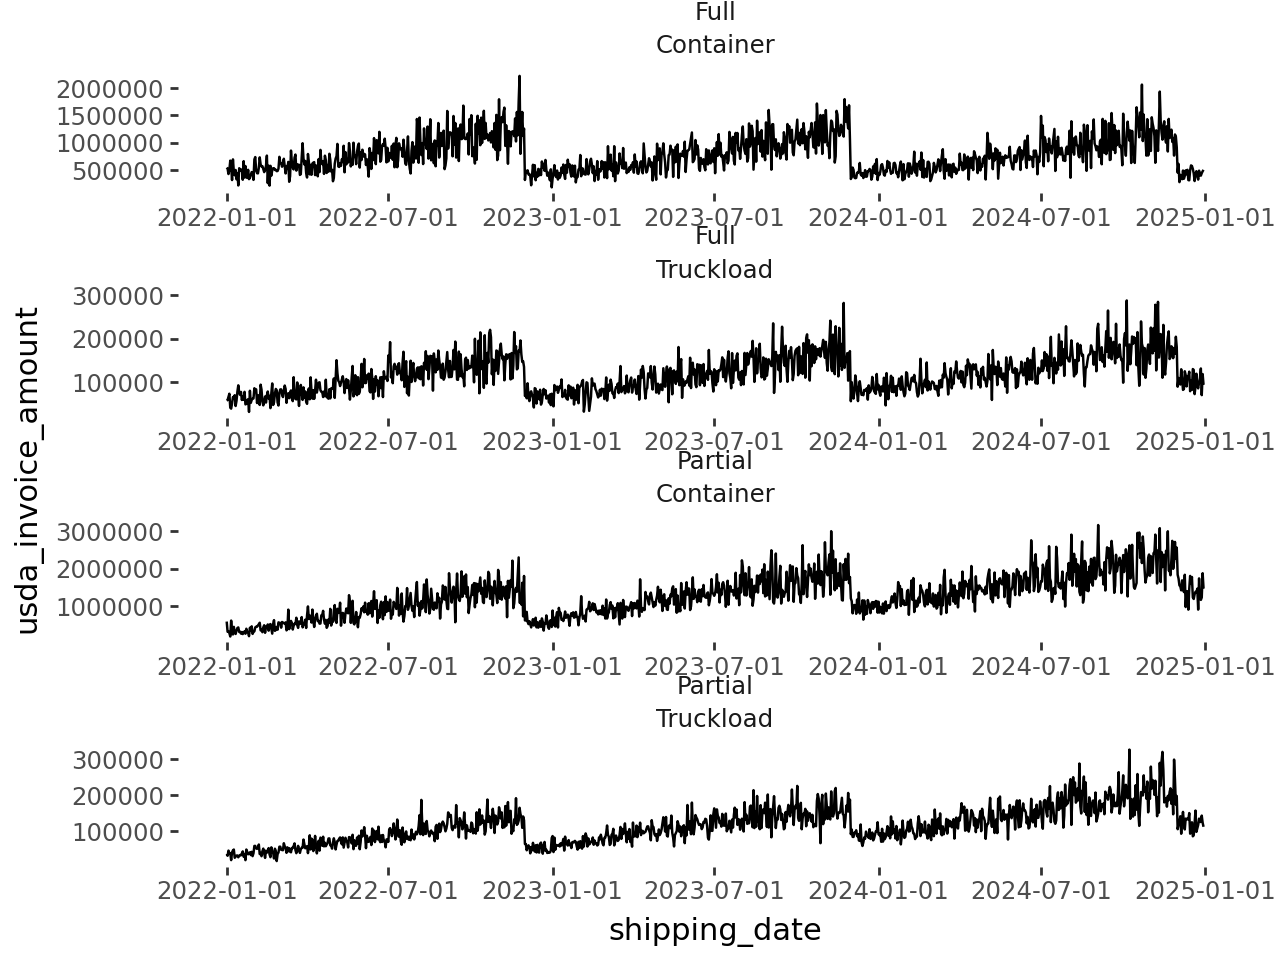

In [43]:
modes_to_keep = ["Partial\nContainer", "Full\nContainer", "Partial\nTruckload", "Full\nTruckload"]

tr_data_short = tr_daily_mode[tr_daily_mode["mode"].isin(modes_to_keep)]

p3 = ggplot(data = tr_data_short, mapping = aes(x = "shipping_date", y = "usda_invoice_amount")) + geom_line() + facet_wrap("mode", ncol=1, scales='free') + theme_tufte()

p3

##### I think this would make more sense if the x axis were months of the year and there were lines representing each year. I have been trying to add a column to capture the year so that I could group by the year values and get three individual lines per facet but I kept getting errors so I have removed all that. I will stick with the plot I have for the sake of this assignment.

c:\Users\gibbs002\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\ggplot.py:630: PlotnineWarning: Saving 10 x 5 in image.
c:\Users\gibbs002\AppData\Local\Programs\Python\Python313\Lib\site-packages\plotnine\ggplot.py:631: PlotnineWarning: Filename: ../plots/seasonality_by_mode.png


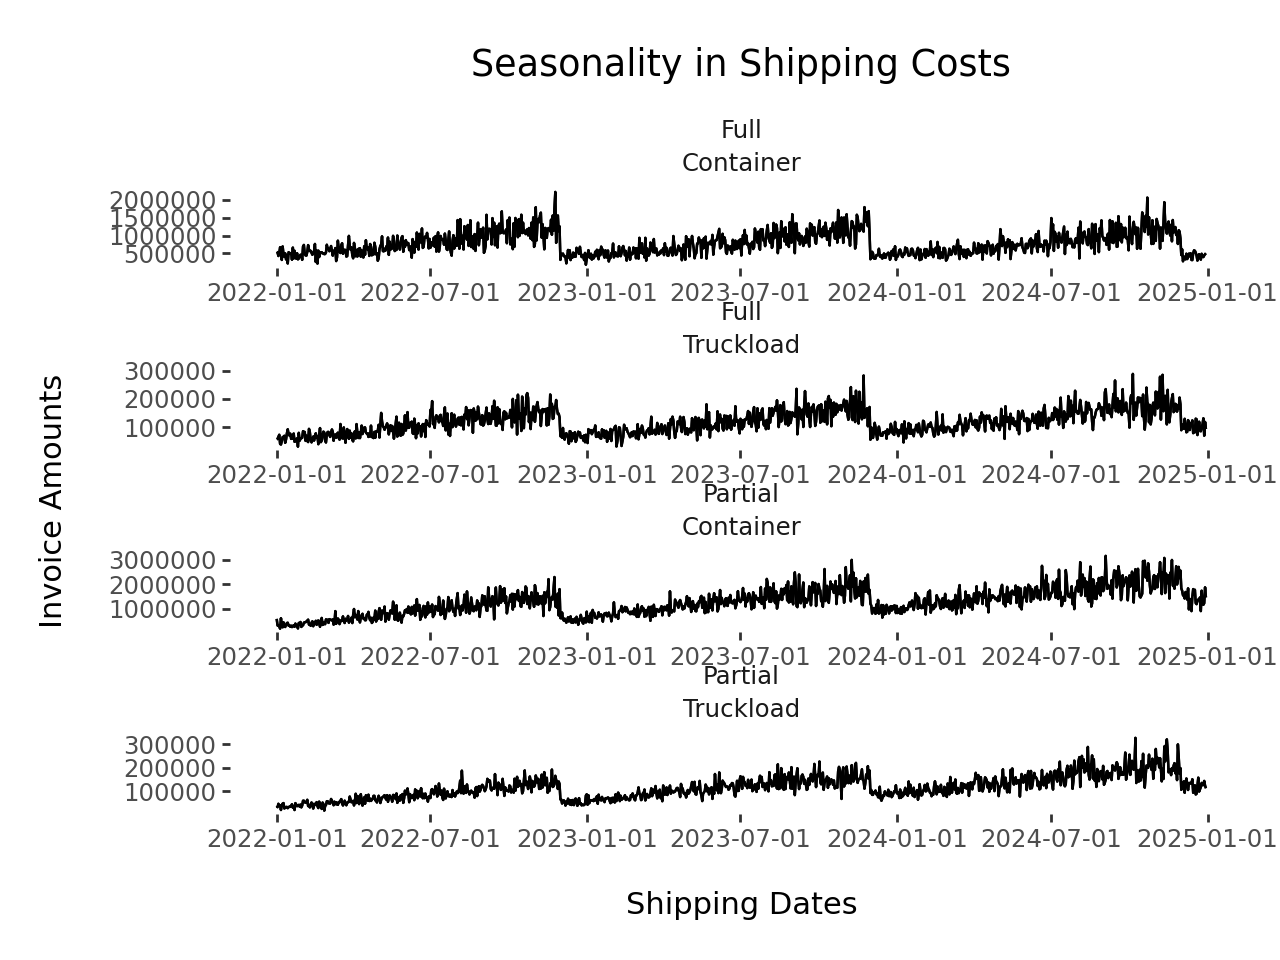

In [44]:
p4 = p3 + geom_line() + facet_wrap("mode", ncol=1,scales='free') + labs(x = "\nShipping Dates\n", y = "\nInvoice Amounts\n", title="\nSeasonality in Shipping Costs\n") + theme_tufte()


ggsave(p4, filename = "../plots/seasonality_by_mode.png", width=10, height = 5, units="in", dpi=300)

p4

## Question 3 — Cost Estimation and Forecasting

##### There is a strong seasonal trend in the value of shipments made over time. less than container load and full container load shipments are the highest value by far so focusing on those two categories would make a big improvement if we were specifically interested in dollar value for budgeting.

##### If the goal is really to forecast shipping costs ourselves (instead of getting estimates from the carrier which seems like a much more straightforward process) then we can definitely consider seasonality. It would also be nice to see if the invoice delay for a full container load shipment varies with a trend over the course of the year. That is to say does the length of the delay also increase in parallel with value of the shipment or do more valuable shipments have less of a delay?

##### Either way if we were in February and wanting to forecast our transportation costs for June the trend we are seeing would be informative.

#### Reference



After getting an error while trying to read the file with pandas I attempted to open the file in Excel and saw that the header mentioned it was a pdf. I opened the file with Acrobat and then copied the information back out into Excel and saved it as tr_data.csv. This still gave me the same error when trying to read it with pandas so I asked ChatGPT.

I provided this prompt: I'm trying to read a csv file with pandas and getting this error "UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc8 in position 10"

and one of the solutions that ChatGPT suggested was this code which I used

    df = pd.read_csv('your_file.csv', encoding='cp1252')

When trying to calculate the average value of the usda_invoice_amount column I received an error which I partially understood to mean that I was trying to do math on non-numerical values.
I gave ChatGPT this prompt: "in python how to I convert data that are objects to numerical values?"

One solution it gave was this code
df['column_name'] = pd.to_numeric(df['column_name'], errors='coerce')